In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from helpers import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [36]:
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
prediction, data, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

#### Data Cleaning and Preprocessing

In [37]:
data = substitute_nan_with_mean(data)

In [38]:
data_log = log_transform(data)

In [39]:
x, mean_x, std_x = standardize(data)

In [40]:
x_log, mean_x_log, std_x_log = standardize(data_log)

In [41]:
prediction_wo, x_wo = remove_outliers(prediction, x, 1, 99)

In [42]:
prediction_wo_log, x_wo_log = remove_outliers(prediction, x_log, 1, 99)

Build 3 models for performance comparison:
- (y, tx) --> raw data model(only standardize and build_model_data)
- (y_wo, tx_wo) --> data model without outliers
- (y_wo_log, tx_wo_log) = data model without outliers and log transform

In [43]:
y, tx = build_model_data(prediction, x)

In [44]:
y_wo, tx_wo = build_model_data(prediction_wo, x_wo)

In [45]:
y_wo_log, tx_wo_log = build_model_data(prediction_wo, x_wo_log)

In [46]:
y.shape

(250000,)

In [37]:
x.shape

(250000, 30)

In [38]:
tx.shape

(250000, 31)

### Exploratory Data Analysis

#### Plots

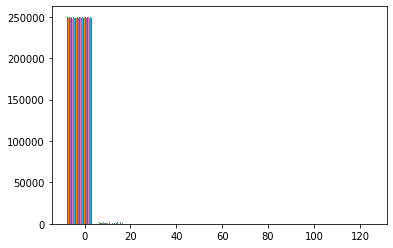

In [39]:
# complete histogram over all features
plt.hist(tx)
plt.show()

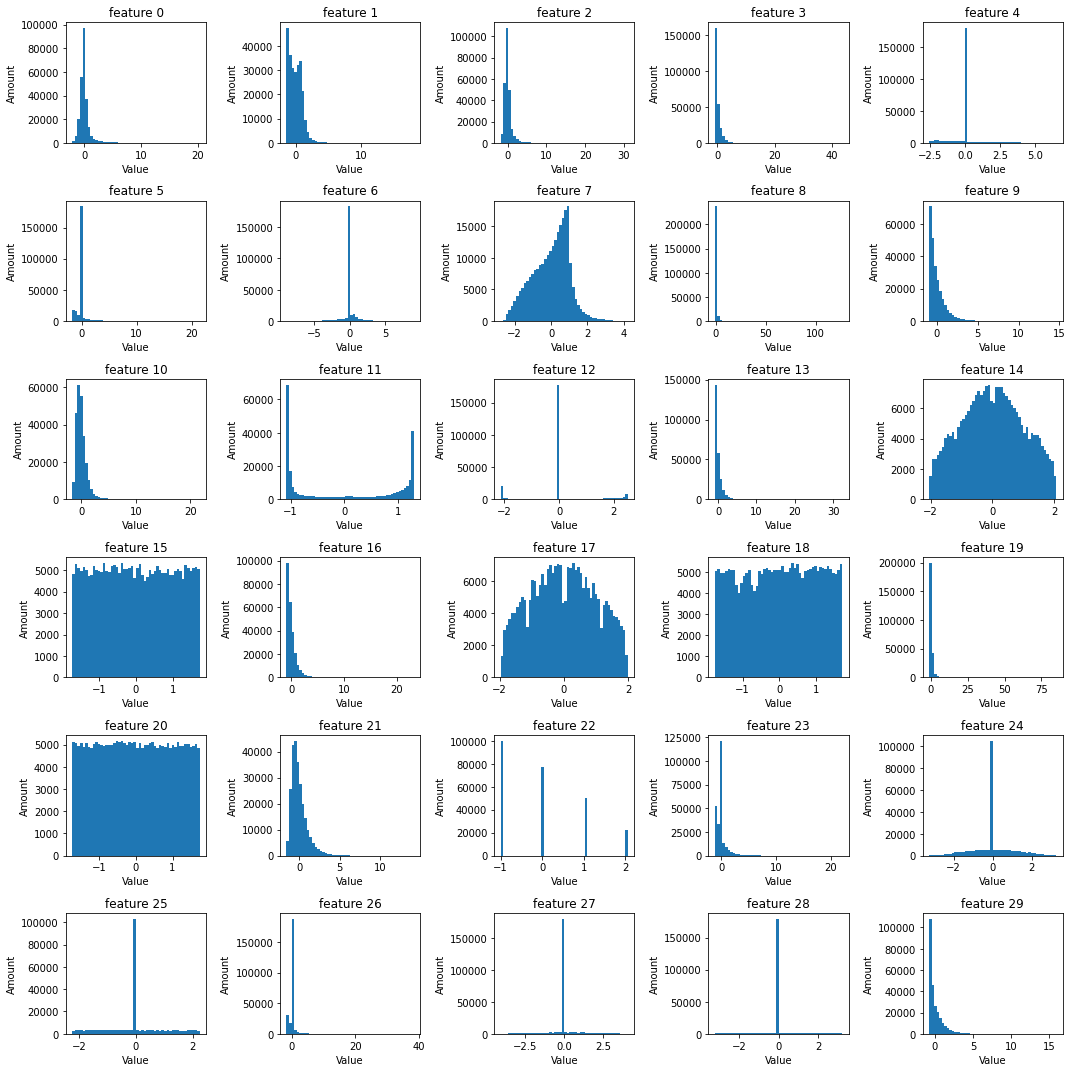

In [47]:
# plots raw data
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx[:, i + 1], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

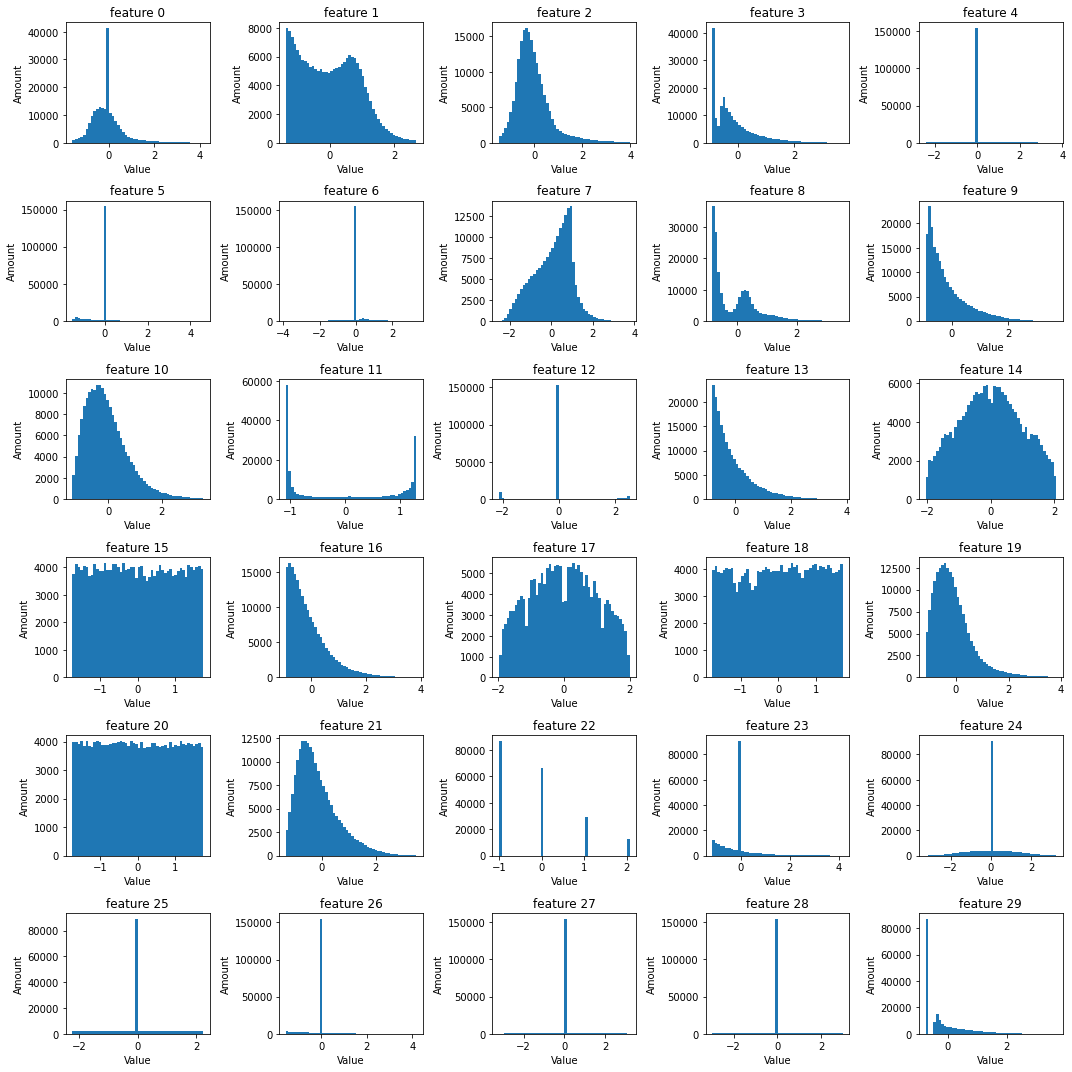

In [48]:
# plot data without outliers
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx_wo[:, i + 1], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

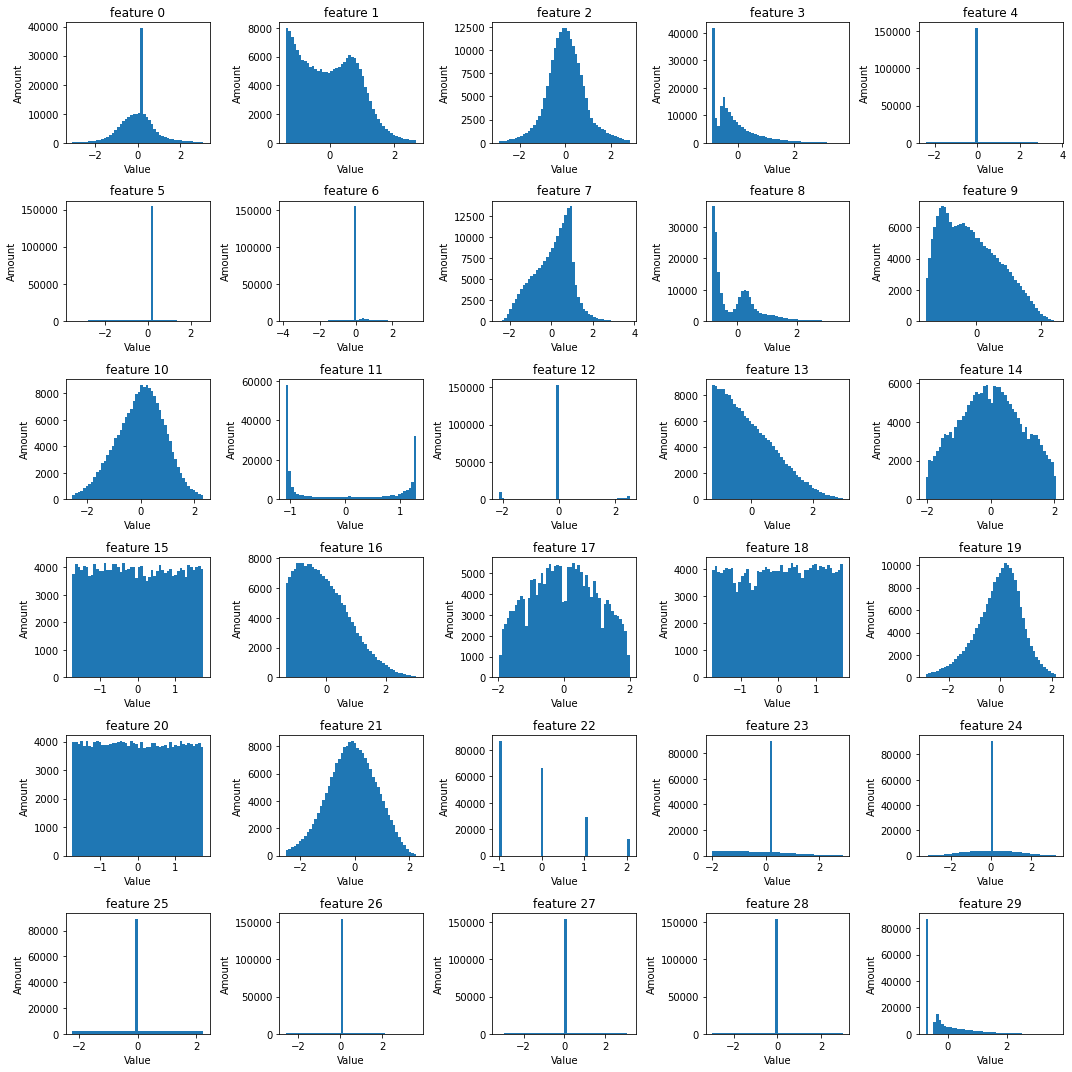

In [158]:
# plot data without outliers and log transformed
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx_wo_log[:, i + 1], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

#### Least Squares

In [62]:
# Least Squares
least_squares_w, least_squares_loss = least_squares(y, tx)
(least_squares_w, least_squares_loss)

(array([-3.14664000e-01,  9.63458005e-03, -2.54719227e-01, -2.63502968e-01,
        -1.10181091e-03,  2.18423834e-02,  9.00537811e-02,  4.83490469e-03,
         2.82008766e-01, -2.81502574e-02, -3.29314810e+02, -1.88141152e-01,
         1.18065031e-01,  7.66172585e-02,  6.39731659e+01, -7.79460374e-04,
        -8.30656859e-04,  6.30888880e+01, -8.61169006e-04,  2.51791374e-03,
         1.03659310e-01,  9.33785798e-04, -4.70019038e-02,  4.17575954e-02,
        -4.75783453e-02,  6.50726235e-04,  1.88755826e-04, -3.66001841e-02,
         1.55837346e-03, -1.74318728e-03,  2.78974331e+02]),
 0.680818904323136)

In [63]:
# calculate prediction
ypred = predict_labels(least_squares_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.744592

In [64]:
# Least Squares
least_squares_w, least_squares_loss = least_squares(y_wo, tx_wo)
(least_squares_w, least_squares_loss)

(array([-3.06034660e-01,  9.17963168e-02, -2.84654975e-01, -4.36180773e-01,
         1.10283329e-01, -3.24094972e-04,  9.29589797e-02, -3.08181098e-02,
         3.72150171e-01, -4.59166319e-02, -1.85343905e+02, -1.46505322e-01,
         7.45104140e-02,  8.07746206e-02,  3.62295100e+01,  5.28048329e-04,
        -3.76922136e-03,  3.56193283e+01, -1.49230054e-05,  2.97284914e-03,
         5.94475839e-02, -5.74266399e-04, -1.21043447e-02, -5.26806427e-03,
        -4.03627051e-02,  4.02016525e-04, -1.92027440e-03, -4.76931079e-02,
         2.56193540e-03, -1.14337931e-03,  1.57020619e+02]),
 0.660865309373378)

In [65]:
# calculate prediction
ypred = predict_labels(least_squares_w, tx_wo)
ypred = np.squeeze(ypred)

(ypred == y_wo).mean()

0.7539579760960254

In [159]:
# Least Squares
least_squares_w, least_squares_loss = least_squares(y_wo_log, tx_wo_log)
(least_squares_w, least_squares_loss)

(array([-3.17528351e-01,  1.19160410e-01, -2.77732967e-01, -2.98539351e-01,
         1.36497679e-01,  1.55287483e-01, -1.46621987e-01, -5.72858665e-02,
         2.98591233e-01, -4.43539742e-02,  2.25413111e-01,  3.64354389e+00,
         7.07071741e-02,  7.67291060e-02,  3.12828685e+00, -6.08630184e-04,
        -3.93081112e-03, -2.41328810e+00,  1.06701278e-03,  3.02149658e-03,
        -2.48265224e-02, -7.77266148e-04,  1.33628740e-02, -3.26410110e-02,
         5.00742061e-02,  2.38096307e-04, -1.91882693e-03,  6.55656192e-02,
         2.06730182e-03, -1.20489475e-03, -2.60743618e-01]),
 0.6620178553550002)

In [160]:
# calculate prediction
ypred = predict_labels(least_squares_w, tx_wo_log)
ypred = np.squeeze(ypred)

(ypred == y_wo_log).mean()

0.755549868195429

#### Gradient Descent

In [81]:
# Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

gradient_w, gradient_loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent: execution time=8.851 seconds
Gradient Descend: final loss = 0.691531370619219


In [82]:
# calculate prediction
ypred = predict_labels(gradient_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.736968

#### Stochastic Gradient Descent

In [150]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.01 # learning rate (if gamma too high (e.g. 0.1), there is no convergence)

# Initialization
initial_w = np.zeros(tx.shape[1])

sgd_w, sgd_loss = least_squares_SGD(y, tx, initial_w, max_iters, gamma)

Stocastic Gradient Descent(0/49): loss=0.9661832382092524, w0=-0.01, w1=0.009305918825607669
Stocastic Gradient Descent(1/49): loss=0.9326256567938171, w0=-0.00026529459491254556, w1=0.009480954434882595
Stocastic Gradient Descent(2/49): loss=0.9118934395331334, w0=-0.009894564952643988, w1=0.009480954434892242
Stocastic Gradient Descent(3/49): loss=0.9128345822719337, w0=0.000506116536493826, w1=0.011609498596492861
Stocastic Gradient Descent(4/49): loss=0.8970991978981739, w0=-0.009186303227122378, w1=0.018004413012609077
Stocastic Gradient Descent(5/49): loss=0.8892152558634696, w0=-0.017934578604230124, w1=0.02073131979626478
Stocastic Gradient Descent(6/49): loss=0.8804056487351359, w0=-0.027526561480721343, w1=0.02073131979627439
Stocastic Gradient Descent(7/49): loss=0.8703895542028499, w0=-0.035312999783875046, w1=0.020731319796282194
Stocastic Gradient Descent(8/49): loss=0.8728888252355443, w0=-0.04700577608315956, w1=0.02743059289409741
Stocastic Gradient Descent(9/49): loss

In [151]:
# calculate prediction
ypred = predict_labels(sgd_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.71212

#### Ridge Regression

In [67]:
lambdas = np.logspace(-5, 0, 15)
seed = 56
degree = 7
split_ratio = 0.5

lambda_ = find_ridge_hyperparameters(y, x, degree, split_ratio, seed, lambdas)# - gives below Lambda, takes a lot of time so made it a comment
#lambda_ = 0.037275937203149416 # best one according to above find_ridge_hyperparameters

ridge_w, ridge_loss = ridge_regression(y, tx, lambda_)

Ridge Regression: loss = 0.5756142230029804
Ridge Regression: loss = 0.5756147024135235
Ridge Regression: loss = 0.5756161810935384
Ridge Regression: loss = 0.5756205723777119
Ridge Regression: loss = 0.5756344358729547
Ridge Regression: loss = 0.5756814692864288
Ridge Regression: loss = 0.5758436297765955
Ridge Regression: loss = 0.5763613144206189
Ridge Regression: loss = 0.5777832066005828
Ridge Regression: loss = 0.5810081918947492
Ridge Regression: loss = 0.5870453489716059
Ridge Regression: loss = 0.5967587060755499
Ridge Regression: loss = 0.6115507264009523
Ridge Regression: loss = 0.6331274064123236
Ridge Regression: loss = 0.6611867353427633
Ridge Regression Hypherparameter found: Lambda = 0.037275937203149416
Ridge Regression: loss = 0.687032107160095


In [68]:
# calculate prediction
ypred = predict_labels(ridge_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.74038

In [69]:
lambdas = np.logspace(-5, 0, 15)
seed = 56
degree = 7
split_ratio = 0.5

lambda_ = find_ridge_hyperparameters(y_wo, tx_wo[:, 1:], degree, split_ratio, seed, lambdas)# - gives below Lambda, takes a lot of time so made it a comment
#lambda_ = 0.037275937203149416 # best one according to above find_ridge_hyperparameters

ridge_w, ridge_loss = ridge_regression(y_wo, tx_wo, lambda_)

Ridge Regression: loss = 0.5447837680623605
Ridge Regression: loss = 0.5447872179787996
Ridge Regression: loss = 0.5447928635739203
Ridge Regression: loss = 0.5448057054454911
Ridge Regression: loss = 0.5448499729859009
Ridge Regression: loss = 0.5450202417541263
Ridge Regression: loss = 0.5456146253021551
Ridge Regression: loss = 0.5473459548378143
Ridge Regression: loss = 0.5514430646918305
Ridge Regression: loss = 0.5592527581892799
Ridge Regression: loss = 0.5710678402743203
Ridge Regression: loss = 0.5860039470478884
Ridge Regression: loss = 0.6043908502982294
Ridge Regression: loss = 0.6279958572485355
Ridge Regression: loss = 0.6574603238670319
Ridge Regression Hypherparameter found: Lambda = 0.0002682695795279727
Ridge Regression: loss = 0.6608683798282081


In [71]:
# calculate prediction
ypred = predict_labels(ridge_w, tx_wo)
ypred = np.squeeze(ypred)

(ypred == y_wo).mean()

0.7539733319683669

## Generate predictions and save ouput in csv format for submission:

In [19]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [24]:
y_pred = predict_labels(least_squares_w, tX_test)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)